In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import warnings
from time import time
warnings.filterwarnings(action='ignore')
import tensorflow as tf

# 데이터 불러오기 및 전처리 과정(모든 모델에 동일부분임)

In [2]:
data = pd.read_csv('data_file_csv.csv', encoding='cp949')
data2 = pd.read_csv('livein.csv', encoding = 'CP949')
data3 = pd.read_csv('school.csv', encoding = 'CP949')
data4 = pd.read_csv('chargestation.csv', encoding = 'cp949')
data

,Unnamed: 0,no,cartype,receipttime,settime,ridetime,startpos1,startpos2,endpos1,endpos2,receipt,ride,receipt-ride,hour,startlat,startlon,endlat,endlon
0,1,8075,중형 승합,2022-05-07 오전 12:08:21,2022-05-07 오전 12:15:19,2022-05-07 오전 12:30:26,영등포구,당산제2동,동작구,신대방제1동,2022/05/07 0:08,2022/05/07 0:30,22,0,37.53,126.90,37.49,126.90
1,2,8231,중형승합,2022-05-07 오전 12:08:51,2022-05-07 오전 12:17:25,2022-05-07 오전 12:46:23,구로구,신도림동,관악구,남현동,2022/05/07 0:08,2022/05/07 0:46,38,0,37.50,126.88,37.47,126.97
2,3,8279,중형 승합,2022-05-07 오전 12:09:00,2022-05-07 오전 12:26:57,2022-05-07 오전 12:54:43,노원구,상계3.4동,노원구,하계1동,2022/05/07 0:09,2022/05/07 0:54,45,0,37.67,127.08,37.64,127.07
3,4,1560,중형 승합,2022-05-07 오전 12:13:00,2022-05-07 오전 12:14:01,2022-05-07 오전 12:14:25,중랑구,상봉제2동,강동구,천호제1동,2022/05/07 0:13,2022/05/07 0:14,1,0,37.59,127.08,37.54,127.13
4,5,7913,중형승합,2022-05-07 오전 12:18:00,2022-05-07 오전 1:15:54,2022-05-07 오전 1:33:16,중랑구,신내2동,동대문구,전농제3동,2022/05/07 0:18,2022/05/07 1:33,75,0,37.61,127.09,37.57,127.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,2236,3573,중형 승합,2022-05-09 오전 7:00:28,2022-05-09 오전 7:08:36,2022-05-09 오전 7:29:07,강동구,암사제1동,종로구,숭인제2동,2022/05/09 7:00,2022/05/09 7:29,29,7,37.55,127.13,37.57,127.01
2068,2237,8276,중형 승합,2022-05-09 오전 7:01:00,2022-05-09 오전 7:23:59,2022-05-09 오전 7:38:06,영등포구,영등포동,서대문구,연희동,2022/05/09 7:01,2022/05/09 7:38,37,7,37.52,126.90,37.57,126.93
2069,2238,3602,중형 승합,2022-05-09 오전 7:01:00,2022-05-09 오전 7:26:08,2022-05-09 오전 7:37:38,구로구,개봉제2동,구로구,구로제5동,2022/05/09 7:01,2022/05/09 7:37,36,7,37.49,126.85,37.50,126.88
2070,2239,8209,중형승합,2022-05-09 오전 7:01:00,2022-05-09 오전 8:07:22,2022-05-09 오전 8:36:50,강서구,우장산동,마포구,성산제2동,2022/05/09 7:01,2022/05/09 8:36,95,7,37.54,126.84,37.56,126.90


In [3]:
#딕셔너리에 키 값을 대입해 벨류값을 얻어오는 함수
def get_value(k,dic):
    for key, value in dic.items():
         if k == key:
            return value
        
#string, float등 의사결정나무에서는 사용하기 힘든 변수를 사용할 수 있게끔 만들어주는 함수
def get_index(name):
    temp_list = data[name].tolist()
    temp_set = set(temp_list)
    temp_list2 = list(temp_set)
    dic= {string:i for i,string in enumerate(temp_list2)}
    
    for i in range(len(temp_list)):
        temp = data.loc[i,name]
        temp_value = get_value(temp,dic)
        data.loc[i,name] = temp_value

In [4]:
#전처리과정
#1. 구가 서울시에 포함된 경우만 데이터에 남김
gu_list = ['강서구', '양천구', '구로구', '영등포구',
              '동작구', '금천구', '관악구', '서초구', 
              '강남구', '송파구', '강동구', '마포구',
              '용산구', '성동구', '광진구', '서대문구',
              '중구', '동대문구', '중랑구', '은평구',
              '종로구', '성북구', '강북구', '도봉구', '노원구']
for i in range(len(data)) :
    if data.iloc[:, 8][i] not in gu_list :
        data.drop(index = i, axis = 0, inplace = True)
    elif data.iloc[:, 6][i] not in gu_list :
        data.drop(index = i, axis = 0, inplace = True)
#2. 변수 startlat과 startlon, 변수 endlat과 endlon을 합치는 작업
for i in range (len(data)):
    data.loc[i,'startplus'] = ['1']
    data.loc[i,'endplus'] = ['1']
    a1 = data.loc[i,'startlat']
    b1 = data.loc[i,'startlon']
    a1 = a1 * 10
    b1 = b1 * 10
    a1 = a1 % 100
    b1 = b1 % 100
    a1 = int(a1)
    b1 = int(b1)
    new1 = a1*100 + b1
    data.loc[i,'startplus'] = [new1]
    a2 = data.loc[i,'endlat']
    b2 = data.loc[i,'endlon']
    a2 = a2 * 10
    b2 = b2 * 10
    a2 = a2 % 100
    b2 = b2 % 100
    a2 = int(a2)
    b2 = int(b2)
    new2 = a2*100 + b2
    new2 =  str(new2)
    data.loc[i,'endplus'] = [new2]
#4. 장애인분들의 이동목적에 따라 인코딩
#일터로의 이동열을 임의로 추가하기
data['gotowork'] = 0
data['gotoschool'] = 0
data['gotocharge'] = 0
#장애인직업재활시설 데이터에서 위도 경도 데이터와 
#본데이터 위도경도 데이터 비교
for i in range(len(data)) :
    for j in range(len(data2)) :
        if data.iloc[i, 16] >= (data2.iloc[j, 3] - 0.01) and data.iloc[i, 16] <= (data2.iloc[j, 3] + 0.01) :
            if data.iloc[i, 17] >= (data2.iloc[j, 4] - 0.01) and data.iloc[i, 17] <= (data2.iloc[j, 4] + 0.01):
                data.iloc[i, 20] = 1
            else :
                data.iloc[i, 20] = 0
        else :
            data.iloc[i, 20] = 0
    for j in range(len(data3)) :
        if data.iloc[i, 16] >= (data3.iloc[j, 1] - 0.01) and data.iloc[i, 16] <= (data3.iloc[j, 1] + 0.01) :
            if data.iloc[i, 17] >= (data3.iloc[j, 2] - 0.01) and data.iloc[i, 17] <= (data3.iloc[j, 2] + 0.01):
                data.iloc[i, 21] = 1
            else :
                data.iloc[i, 21] = 0
        else :
            data.iloc[i, 21] = 0
    for j in range(len(data4)) :
        if data.iloc[i, 16] >= (data4.iloc[j, 4] - 0.01) and data.iloc[i, 16] <= (data4.iloc[j, 4] + 0.01) :
            if data.iloc[i, 17] >= (data4.iloc[j, 5] - 0.01) and data.iloc[i, 17] <= (data4.iloc[j, 5] + 0.01):
                data.iloc[i, 22] = 1
            else :
                data.iloc[i, 22] = 0
        else :
            data.iloc[i, 22] = 0
#5. startpos1, startpos2, endpos1, endpos2를 숫자로 바꾸어주는 작업
get_index('startpos1')
get_index('startpos2')
get_index('endpos1')
get_index('endpos2')
data['startpos1'] = pd.to_numeric(data['startpos1'])
data['startpos2'] = pd.to_numeric(data['startpos2'])
#6. 이동목적 변수를 3가지 범주로 다시 변환
# list로 만들기
list_gotowork=data['gotowork'].to_list()
list_gotoschool=data['gotoschool'].to_list()
list_gotocharge=data['gotocharge'].to_list()
# end_destination에 연산결과 추가하기
for i in range(len(data)):
    if (list_gotowork[i] *100+ 
                           list_gotoschool[i]*10+
                           list_gotocharge[i] == 100) :
        data.loc[i, 'end_destination'] = int(3)
    elif (list_gotowork[i] *100+ 
                           list_gotoschool[i]*10+
                           list_gotocharge[i] == 10) :
        data.loc[i, 'end_destination'] = int(2)
    elif (list_gotowork[i] *100+ 
                           list_gotoschool[i]*10+
                           list_gotocharge[i] == 1) :
        data.loc[i, 'end_destination'] = int(1)
    else :
        data.loc[i, 'end_destination'] = int(0)
data.drop(columns=["Unnamed: 0"],inplace=True)
data.head()

,no,cartype,receipttime,settime,ridetime,startpos1,startpos2,endpos1,endpos2,receipt,...,startlat,startlon,endlat,endlon,startplus,endplus,gotowork,gotoschool,gotocharge,end_destination
0,8075,중형 승합,2022-05-07 오전 12:08:21,2022-05-07 오전 12:15:19,2022-05-07 오전 12:30:26,19,25,3,135,2022/05/07 0:08,...,37.53,126.90,37.49,126.90,7569,7469,0,0,0,0.0
1,8231,중형승합,2022-05-07 오전 12:08:51,2022-05-07 오전 12:17:25,2022-05-07 오전 12:46:23,20,203,9,83,2022/05/07 0:08,...,37.50,126.88,37.47,126.97,7568,7469,0,0,0,0.0
2,8279,중형 승합,2022-05-07 오전 12:09:00,2022-05-07 오전 12:26:57,2022-05-07 오전 12:54:43,15,271,15,124,2022/05/07 0:09,...,37.67,127.08,37.64,127.07,7670,7670,0,0,0,0.0
3,1560,중형 승합,2022-05-07 오전 12:13:00,2022-05-07 오전 12:14:01,2022-05-07 오전 12:14:25,11,78,4,238,2022/05/07 0:13,...,37.59,127.08,37.54,127.13,7570,7571,0,0,0,0.0
4,7913,중형승합,2022-05-07 오전 12:18:00,2022-05-07 오전 1:15:54,2022-05-07 오전 1:33:16,11,49,14,280,2022/05/07 0:18,...,37.61,127.09,37.57,127.06,7670,7570,0,0,0,0.0


# 전처리 완료한 데이터셋 저장시키기

In [53]:
#csv파일 따로 저장
data.to_csv("data_file_csv_final.csv")

# 데이터 불러오기

In [56]:
data = pd.read_csv('data_file_csv_final.csv', encoding='utf-8')
data.drop(columns=["Unnamed: 0"],inplace=True)
data

,no,cartype,receipttime,settime,ridetime,startpos1,startpos2,endpos1,endpos2,receipt,...,startlat,startlon,endlat,endlon,startplus,endplus,gotowork,gotoschool,gotocharge,end_destination
0,8075,중형 승합,2022-05-07 오전 12:08:21,2022-05-07 오전 12:15:19,2022-05-07 오전 12:30:26,19,25,3,135,2022/05/07 0:08,...,37.53,126.90,37.49,126.90,7569,7469,0,0,0,0.0
1,8231,중형승합,2022-05-07 오전 12:08:51,2022-05-07 오전 12:17:25,2022-05-07 오전 12:46:23,20,203,9,83,2022/05/07 0:08,...,37.50,126.88,37.47,126.97,7568,7469,0,0,0,0.0
2,8279,중형 승합,2022-05-07 오전 12:09:00,2022-05-07 오전 12:26:57,2022-05-07 오전 12:54:43,15,271,15,124,2022/05/07 0:09,...,37.67,127.08,37.64,127.07,7670,7670,0,0,0,0.0
3,1560,중형 승합,2022-05-07 오전 12:13:00,2022-05-07 오전 12:14:01,2022-05-07 오전 12:14:25,11,78,4,238,2022/05/07 0:13,...,37.59,127.08,37.54,127.13,7570,7571,0,0,0,0.0
4,7913,중형승합,2022-05-07 오전 12:18:00,2022-05-07 오전 1:15:54,2022-05-07 오전 1:33:16,11,49,14,280,2022/05/07 0:18,...,37.61,127.09,37.57,127.06,7670,7570,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,3573,중형 승합,2022-05-09 오전 7:00:28,2022-05-09 오전 7:08:36,2022-05-09 오전 7:29:07,4,290,22,175,2022/05/09 7:00,...,37.55,127.13,37.57,127.01,7571,7570,0,0,0,0.0
2068,8276,중형 승합,2022-05-09 오전 7:01:00,2022-05-09 오전 7:23:59,2022-05-09 오전 7:38:06,19,147,13,22,2022/05/09 7:01,...,37.52,126.90,37.57,126.93,7569,7569,0,0,0,0.0
2069,3602,중형 승합,2022-05-09 오전 7:01:00,2022-05-09 오전 7:26:08,2022-05-09 오전 7:37:38,20,252,20,289,2022/05/09 7:01,...,37.49,126.85,37.50,126.88,7468,7568,0,0,0,0.0
2070,8209,중형승합,2022-05-09 오전 7:01:00,2022-05-09 오전 8:07:22,2022-05-09 오전 8:36:50,24,255,7,29,2022/05/09 7:01,...,37.54,126.84,37.56,126.90,7568,7569,0,0,0,0.0


# 모델 생성 과정(Train/Test Split, Hyperparameter Tuning)

In [5]:
x=np.array(data.loc[: ,['end_destination', 'startplus',
                        'receipt-ride','hour',
                         'startpos1', 'startpos2']])
y=data['endplus']
#  data train,test로 나누기
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.1, random_state=42, shuffle=False)
print(x_train.shape)
print(x_test.shape)

(1864, 6)
(208, 6)


In [6]:
#임의로 각 모델을 정의하기
#아래로직을 통해 재정의를 함
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier()

In [7]:
tree_params = {
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
}
t_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state = 10), 
    tree_params, 
    cv=10
)

In [8]:
#### hyperparameter를 여러개로 바꿔서 
#다시 KNeighborsClassifier 수행하기
k_params = {
    'n_neighbors' : [3, 5, 7, 9, 11],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}
k_grid_search = GridSearchCV(
    estimator=knn_clf, 
    param_grid=k_params, 
    n_jobs=-1, 
    cv=10,
    verbose = 1
)

In [9]:
#### hyperparameter를 여러개로 바꿔서 
#다시 RandomforestClassifier 수행하기
r_params = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0, 10]
}
r_grid_search = GridSearchCV(
    estimator=rf_clf, 
    param_grid=r_params, 
    n_jobs=-1, 
    cv=10
)

In [38]:
#### hyperparameter를 여러개로 바꿔서 
#다시 adaboost 수행하기

d_grid_result = t_grid_search.fit(x_train,y_train)
print(t_grid_search.best_params_)
best_d_clf = t_grid_search.best_estimator_
best_d_clf.fit(x_train, y_train)

ada_params = {
    'n_estimators' : [10,20,50,100],
    'learning_rate' : [0.1,0.2]
}
ada_grid_search = GridSearchCV(
    estimator=AdaBoostClassifier(
        base_estimator=best_d_clf,
        n_estimators=10,
        learning_rate=0.1), 
    param_grid=ada_params, 
    n_jobs=-1, 
    cv=10,
    scoring='accuracy'
)

{'criterion': 'entropy', 'max_depth': 15}


In [39]:
#### hyperparameter를 여러개로 바꿔서 
#다시 gradientboost 수행하기
gb_params = {
    'n_estimators' : [10,20,50,100],
    'learning_rate' : [0.1,0.2]
}
gb_grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state = 10), 
    param_grid=gb_params, 
    n_jobs=-1, 
    cv=10,
    scoring='accuracy'
)

In [40]:
#kneighbor 다시 적용
k_grid_result = k_grid_search.fit(x_train,y_train)
print(k_grid_search.best_params_)
best_k_clf = k_grid_search.best_estimator_
best_k_clf.fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [41]:
#randomforest 다시 적용
r_grid_result = r_grid_search.fit(x_train,y_train)
print(r_grid_search.best_params_)
best_r_clf = r_grid_search.best_estimator_
best_r_clf.fit(x_train, y_train)

{'max_depth': 12, 'n_estimators': 330, 'random_state': 10}


RandomForestClassifier(max_depth=12, n_estimators=330, random_state=10)

In [42]:
#adaboost 다시 적용
ada_grid_result = ada_grid_search.fit(x_train,y_train)
print(ada_grid_search.best_params_)
best_ada_clf = ada_grid_search.best_estimator_
best_ada_clf.fit(x_train, y_train)

{'learning_rate': 0.1, 'n_estimators': 20}


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=15,
                                                         random_state=10),
                   learning_rate=0.1, n_estimators=20)

In [43]:
#gradientboost 다시 적용
gb_grid_result = gb_grid_search.fit(x_train,y_train)
print(gb_grid_search.best_params_)
best_gb_clf = gb_grid_search.best_estimator_
best_gb_clf.fit(x_train, y_train)

{'learning_rate': 0.2, 'n_estimators': 100}


GradientBoostingClassifier(learning_rate=0.2, random_state=10)

In [44]:
vo_clf = VotingClassifier(estimators=[("RF", best_r_clf),
                                        ("AC", best_ada_clf),
                                        ("KN", best_k_clf),
                                        ("GN", best_gb_clf)], voting="soft")

In [45]:
# 정확도 
classifiers = [ best_r_clf, best_ada_clf, best_gb_clf, best_k_clf, vo_clf ]
pred_final = []
accuracy_store = []
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    name = classifier.__class__.__name__
    print("{}의 예측 정확도 : {}".format(name, 
                                   round(accuracy_score(y_test, pred), 3)))
    pred_final.append(pred)
    accuracy_store.append(accuracy_score(y_test, pred))
pred_final = np.transpose(pred_final)
print("Stacking 이전 일반모델들의 예측 정확도 평균 : {}"
      .format(round(np.mean(accuracy_store), 3)))
print("Stacking 이전 일반모델 중 예측 정확도 높은 모델 : {}"
      .format(round(np.max(accuracy_store), 3)))

RandomForestClassifier의 예측 정확도 : 0.635
AdaBoostClassifier의 예측 정확도 : 0.663
GradientBoostingClassifier의 예측 정확도 : 0.678
KNeighborsClassifier의 예측 정확도 : 0.654
VotingClassifier의 예측 정확도 : 0.663
Stacking 이전 일반모델들의 예측 정확도 평균 : 0.659
Stacking 이전 일반모델 중 예측 정확도 높은 모델 : 0.678


## Stacking실시

In [18]:
# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성
accuracy_total = []
def get_stacking_base_datasets(model, X_train_n, y_train_n
                               , X_test_n, n_folds ):
    n_iter = 0
    kfold = KFold(n_splits = n_folds)
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    #print(model.__class__.__name__ , ' model 시작 ')
    for train_idx, test_idx in kfold.split(X_train_n) :
        x_tr, x_te = X_train_n[train_idx], X_train_n[test_idx]
        y_tr, y_te = y_train_n[train_idx], y_train_n[test_idx]
        #print('폴드 세트: ',n_iter,' 시작 ')
        model.fit(x_tr, y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 
        #기반 모델 예측 후 데이터 저장.
        train_fold_pred[test_idx, :] = model.predict(x_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 
        #예측 후 데이터 저장. 
        test_pred[:, n_iter] = model.predict(X_test_n)
        n_iter += 1
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    return train_fold_pred, test_pred_mean

In [46]:
# 모델 돌리기 함수
def get_predict_datasets(x_test):
    # CV스태킹 알고리즘 각 모델에 적용
    rf_train, rf_test = get_stacking_base_datasets(best_r_clf, x_train,
                                               y_train, x_test, 10)
    kn_train, kn_test = get_stacking_base_datasets(best_k_clf, x_train, 
                                                 y_train, x_test, 10) 
    ab_train, ab_test = get_stacking_base_datasets(best_ada_clf, x_train, 
                                                 y_train, x_test, 10) 
    gn_train, gn_test = get_stacking_base_datasets(best_gb_clf, x_train, 
                                                 y_train, x_test, 10) 
    vo_train, vo_test = get_stacking_base_datasets(vo_clf, x_train, 
                                                 y_train, x_test, 10) 
    # CV스태킹 알고리즘 결과로 메타 모델 학습/시험에 필요한 
    # result_a result_b 만들기 
    Stack_final_X_train = np.concatenate((rf_train, kn_train, 
                                          ab_train, gn_train, vo_train),
                                     axis=1)
    Stack_final_X_test = np.concatenate((rf_test, kn_test,
                                         ab_test, gn_test, vo_test), 
                                     axis=1)
    return Stack_final_X_train, Stack_final_X_test

In [47]:
# 모델 완성시키는 함수
def Model(sfxtr, sfxte):
    best_r_clf.fit(sfxtr, y_train)
    best_ada_clf.fit(sfxtr, y_train)
    best_k_clf.fit(sfxtr, y_train)
    best_gb_clf.fit(sfxtr, y_train)
    vo_clf.fit(sfxtr, y_train)

    #  개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
    PredictModel = VotingClassifier(estimators=[("RF", best_r_clf),
                                                ("AC", best_ada_clf),
                                                ("KN", best_k_clf),
                                                ("GN", best_gb_clf),
                                                ("VO", vo_clf)
                                               ], voting="soft")
    PredictModel.fit(sfxtr, y_train)
    predict_in = PredictModel.predict(sfxte)
    return predict_in

# 메타모델 생성 후 정확도 시각화

In [48]:
sfxtr, sfxte = get_predict_datasets(x_test)

In [49]:
res = Model(sfxtr, sfxte)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(
    accuracy_score(y_test, res)))

최종 메타 모델의 예측 정확도: 0.6202


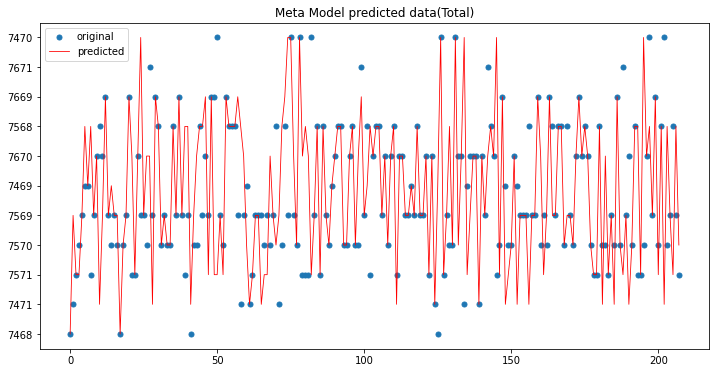

In [50]:
x_ax = range(len(y_test))
plt.rcParams["figure.figsize"] = (12,6)
plt.scatter(x_ax, y_test, label="original", alpha = 1, s = 5**2)
plt.plot(x_ax, res, lw=0.8, color="red", label="predicted")
plt.title("Meta Model predicted data(Total)")
plt.legend()
plt.show()

# 예측모델 결과

In [51]:
Test_Predict = pd.DataFrame({
    'PassengerDestination' : y_test,
    'predict' : res,
    'Success' : res == y_test
})
Test_Predict['Success'].value_counts()

True     129
False     79
Name: Success, dtype: int64

In [52]:
Test_Predict[:30]

,PassengerDestination,predict,Success
1864,7468,7468,True
1865,7471,7569,False
1866,7571,7571,True
1867,7570,7571,False
1868,7569,7569,True
1869,7469,7568,False
1870,7469,7469,True
1871,7571,7568,False
1872,7569,7569,True
1873,7670,7670,True


# 예측모델로 임의의 예측행렬 대입 시 결과확인

In [26]:
tic = time()
x_test_list = [0, 7570, 35, 7, 14, 323]
input_Array = np.asarray(x_test_list)
input_reshape = input_Array.reshape(1, -1)
sfxtr_input, sfxte_input = get_predict_datasets(input_reshape)
res_analysis = Model(sfxtr_input, sfxte_input)
print('예측결과 : {}'.format(res_analysis))
print("Model RunningTime done in {:.3f}s".format(time()-tic))

예측결과 : ['7571']
Model RunningTime done in 191.625s
